## Import Data from Sklearn

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris() 
X = iris.data 
target = iris.target 
names = iris.target_names

#print('The data matrix:\n',iris['data'])
#print('The classification target:\n',iris['target'])
print('The names of the dataset columns:\n',iris['feature_names'])
print('The names of target classes:\n',iris['target_names'])
#print('The full description of the dataset:\n',iris['DESCR'])
#print('The path to the location of the data:\n',iris['filename'])

The names of the dataset columns:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The names of target classes:
 ['setosa' 'versicolor' 'virginica']


# 1. Graphical exploratory data analysis
## Preparing the data

In [2]:
# create index for the DataFrame
species=[]
for item in iris.target:
    if item == 0:
        species.append('setosa')
    elif item ==1:
        species.append('versicolor')
    else:
        species.append('virginica')

In [3]:
# Create a DataFrame from Iris Data
data = pd.DataFrame(iris.data,columns=iris['feature_names'])
data['species']=species
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
#Data used in the course
versicolor_petal_length = data.loc[data.species=="versicolor","petal length (cm)"]
setosa_petal_length=data.loc[data.species=="setosa","petal length (cm)"]
virginica_petal_length=data.loc[data.species=="virginica","petal length (cm)"]
versicolor_petal_width = data.loc[data.species=="versicolor","petal width (cm)"]
print(versicolor_petal_length.head())

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: petal length (cm), dtype: float64


### Plotting a histogram of iris data

In [5]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

<Figure size 640x480 with 1 Axes>

## Adjusting the number of bins in a histogram

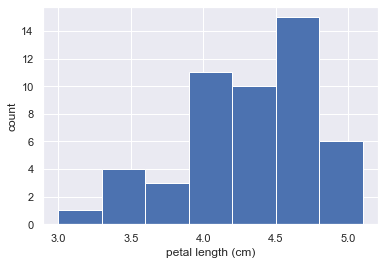

In [6]:
# Compute number of data points: n_data
n_data=len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins= int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length,bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

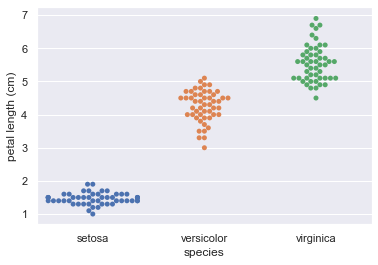

In [7]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species', y='petal length (cm)',data = data)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')
# Show the plot
plt.show()


## Computing the ECDF

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


## Plotting the ECDF

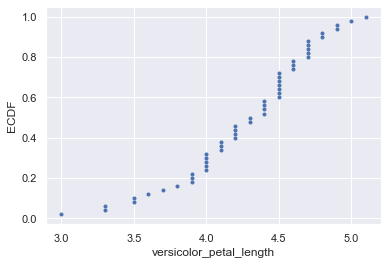

In [9]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers,y_vers,marker ='.',linestyle='none')

# Label the axes
plt.xlabel('versicolor_petal_length')
plt.ylabel('ECDF')


# Display the plot

plt.show()

## Comparison of ECDFs


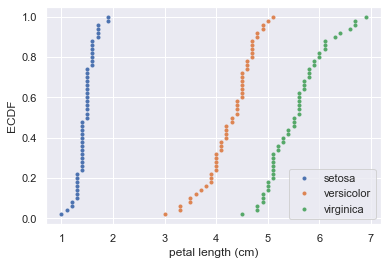

In [10]:
# Compute ECDFs
x_set, y_set=ecdf(setosa_petal_length)
x_vers, y_vers=ecdf(versicolor_petal_length)
x_virg, y_virg=ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot

_ = plt.plot(x_set, y_set,marker='.',linestyle = 'none')
_ = plt.plot(x_vers, y_vers,marker='.',linestyle = 'none')
_ = plt.plot(x_virg, y_virg,marker='.',linestyle = 'none')
# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# 2. Quantitative exploratory data analysis

## Computing means

In [11]:
# Compute the mean: mean_length_vers
mean_length_vers = versicolor_petal_length.mean()

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


## Computing percentiles

In [12]:
# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length,percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


## Comparing percentiles to ECDF

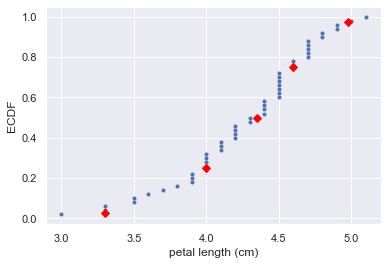

In [13]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


## Box-and-whisker plot

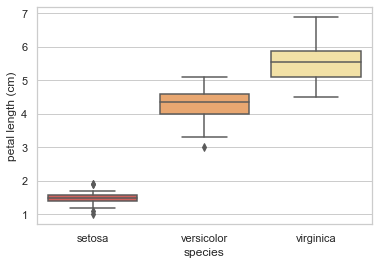

In [30]:
# Create box plot with Seaborn's default settings
sns.set_style("whitegrid")
sns.set_palette("Spectral")
sns.boxplot(data=data,x='species',y='petal length (cm)')

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')


# Show the plot
plt.show()


## Computing the variance


In [31]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000012 0.21640000000000012


## The standard deviation and the variance


In [ ]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(versicolor_petal_length.std())

## Scatter plots

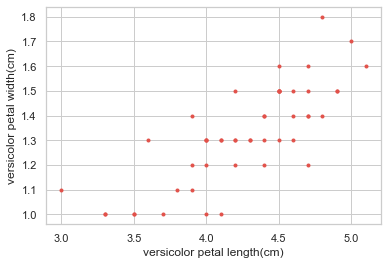

In [34]:
# Make a scatter plot
plt.plot(versicolor_petal_length,versicolor_petal_width,marker='.',linestyle='none')


# Label the axes
plt.xlabel('versicolor petal length(cm)')
plt.ylabel('versicolor petal width(cm)')

# Show the result
plt.show()

## Computing the covariance


In [35]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length,versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


## Computing the Pearson correlation coefficient


In [ ]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r= pearson_r(versicolor_petal_length,versicolor_petal_width)

# Print the result
print(r)